# Bagging
Shaney Flores

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

SEED = 13
rng = np.random.default_rng(SEED)

## Q1.

In this project you will apply bagging to implement an ensemble learning approach for solving a (binary) classification problem. The training data set is given in Fig 3.36 (the table labeled “Training”) on page 189 of the textbook (2nd edition). The base classifier will be a decision tree.

Determine the number of base classifiers (or bagging rounds) and show the result of each round (the records chosen at each round and the model (tree) obtained at each round).

What is the result of running your ensemble classifier on the data set given in the second table (labeled “Validation”) in Fig 3.36 on page 189 of the textbook?

Bagging Round #1
Sample:
   A  B  C  Class
8  1  0  1      1
4  0  1  1     -1
2  0  0  1      1
3  0  1  0      1
8  1  0  1      1
7  1  1  0     -1
7  1  1  0     -1
3  0  1  0      1
7  1  1  0     -1
6  1  0  0      1
Decision Tree:



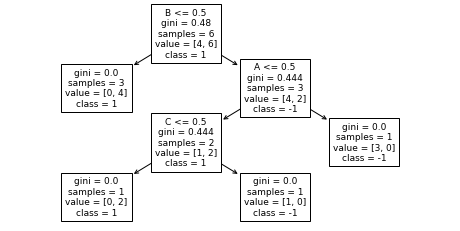

Bagging Round #2
Sample:
    A  B  C  Class
7   1  1  0     -1
4   0  1  1     -1
2   0  0  1      1
2   0  0  1      1
10  1  1  0     -1
4   0  1  1     -1
9   1  1  0     -1
9   1  1  0     -1
7   1  1  0     -1
6   1  0  0      1
Decision Tree:



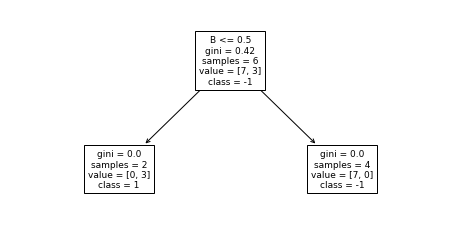

Bagging Round #3
Sample:
    A  B  C  Class
4   0  1  1     -1
8   1  0  1      1
9   1  1  0     -1
9   1  1  0     -1
3   0  1  0      1
6   1  0  0      1
8   1  0  1      1
10  1  1  0     -1
10  1  1  0     -1
1   0  0  0      1
Decision Tree:



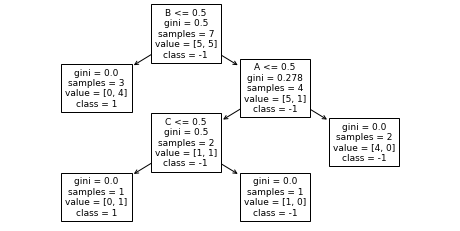

Bagging Round #4
Sample:
    A  B  C  Class
1   0  0  0      1
10  1  1  0     -1
6   1  0  0      1
4   0  1  1     -1
9   1  1  0     -1
5   1  0  0      1
3   0  1  0      1
2   0  0  1      1
8   1  0  1      1
3   0  1  0      1
Decision Tree:



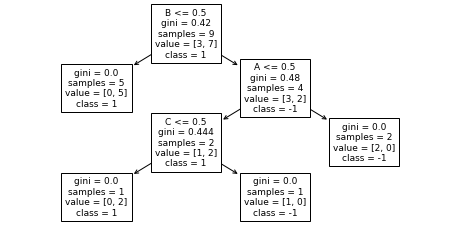

Bagging Round #5
Sample:
    A  B  C  Class
2   0  0  1      1
3   0  1  0      1
5   1  0  0      1
6   1  0  0      1
10  1  1  0     -1
9   1  1  0     -1
10  1  1  0     -1
8   1  0  1      1
10  1  1  0     -1
8   1  0  1      1
Decision Tree:



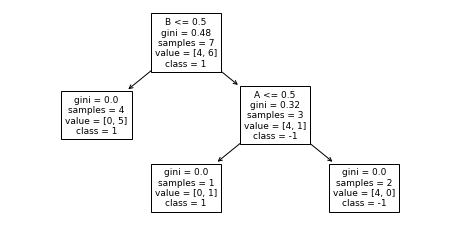

Bagging Round #6
Sample:
    A  B  C  Class
2   0  0  1      1
10  1  1  0     -1
1   0  0  0      1
3   0  1  0      1
6   1  0  0      1
7   1  1  0     -1
7   1  1  0     -1
5   1  0  0      1
7   1  1  0     -1
1   0  0  0      1
Decision Tree:



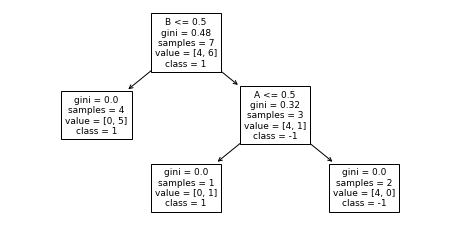

Bagging Round #7
Sample:
   A  B  C  Class
5  1  0  0      1
7  1  1  0     -1
9  1  1  0     -1
7  1  1  0     -1
5  1  0  0      1
3  0  1  0      1
5  1  0  0      1
5  1  0  0      1
1  0  0  0      1
2  0  0  1      1
Decision Tree:



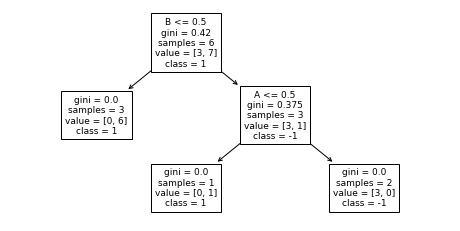

Bagging Round #8
Sample:
   A  B  C  Class
7  1  1  0     -1
2  0  0  1      1
5  1  0  0      1
5  1  0  0      1
1  0  0  0      1
7  1  1  0     -1
7  1  1  0     -1
1  0  0  0      1
1  0  0  0      1
5  1  0  0      1
Decision Tree:



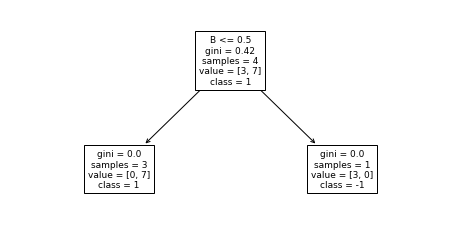

Bagging Round #9
Sample:
    A  B  C  Class
4   0  1  1     -1
3   0  1  0      1
6   1  0  0      1
2   0  0  1      1
10  1  1  0     -1
7   1  1  0     -1
8   1  0  1      1
1   0  0  0      1
6   1  0  0      1
1   0  0  0      1
Decision Tree:



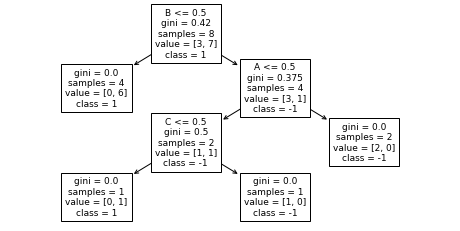

Bagging Round #10
Sample:
   A  B  C  Class
7  1  1  0     -1
3  0  1  0      1
5  1  0  0      1
9  1  1  0     -1
7  1  1  0     -1
4  0  1  1     -1
7  1  1  0     -1
5  1  0  0      1
1  0  0  0      1
9  1  1  0     -1
Decision Tree:



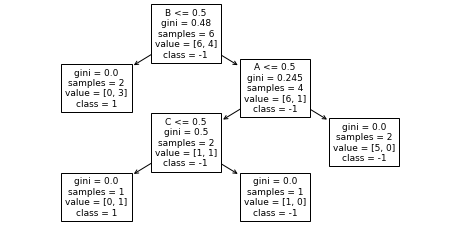

In [2]:
from sklearn.ensemble import BaggingClassifier

train_data = pd.DataFrame({'A':[0,0,0,0,1,1,1,1,1,1], 'B':[0,0,1,1,0,0,1,0,1,1], 'C':[0,1,0,1,0,0,0,1,0,0]})
test_data = pd.DataFrame({'A':[0,0,1,1,1], 'B':[0,1,1,0,0], 'C':[0,1,0,1,0]})

train_x = train_data.to_numpy()
test_x = test_data.to_numpy()
train_y = np.array([1,1,1,-1,1,1,-1,1,-1,-1])
test_y = np.array([1,1,1,-1,1])

k = 10 #bagging rounds

def decision_tree(tree, feats, clss):
    plt.figure(figsize=(8,4))
    plot_tree(tree, feature_names=feats, class_names=clss, fontsize=9)
    plt.show()

dct = DecisionTreeClassifier(random_state=SEED)
clf = BaggingClassifier(base_estimator=dct, n_estimators=k, random_state=SEED)
clf.fit(train_x, train_y)

bag_round=1
for bag, samp in zip(clf.estimators_, clf.estimators_samples_):
    print(f'Bagging Round #{bag_round}')
    samp_indxs = samp + 1
    print(f'Sample:\n{pd.DataFrame(np.c_[train_x[samp,:], train_y[samp]], columns=["A","B","C","Class"], index=samp_indxs)}')
    print('Decision Tree:\n')
    decision_tree(bag, ['A','B','C'], ['-1','1'])
    bag_round += 1
    



We will now apply our ensemble model to the test data to determine its accuracy.

In [3]:
preds = clf.predict(test_x)
print(f'Predicted Classes: {preds}')
print(f'Accuracy: {clf.score(test_x, test_y)*100}%')

Predicted Classes: [ 1 -1 -1  1  1]
Accuracy: 40.0%


## Q2.

In this project you will apply the AdaBoost boosting algorithm to implement an ensemble learning approach for solving a (binary) classification problem. The (one- dimensional) training data set D is given in Table 4.12 on page 352 of the textbook. The base classifier is a simple, one-level decision tree (decision stump) (as explained on p. 303 of the textbook).

Determine the number of boosting rounds and show the result of each round (the probability distribution pi’s at each round, the records chosen at each round, the model (tree) obtained at each round, the ε and the α at each round), as well as the result obtained on D with the final ensemble classifier. Note that the textbook uses the notation w (weight) for what we called p (probability) in the derivation we did in the lectures. (The textbook has quite a few typos!) Also, do not forget the stopping condition we discussed.

What is the result of running your ensemble classifier on the following test data? X = 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0

Round #1
x: [7.  7.  7.  4.5 0.5 9.5 5.3 0.5 9.5 9.5]
y: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
Decision Tree:



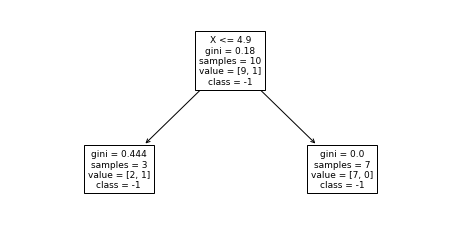

Round #2
x: [4.6 5.3 3.  4.6 5.3 4.6 4.6 4.5 5.3 4.6]
y: [ 1  1  1  1  1 -1 -1 -1 -1 -1]
Decision Tree:



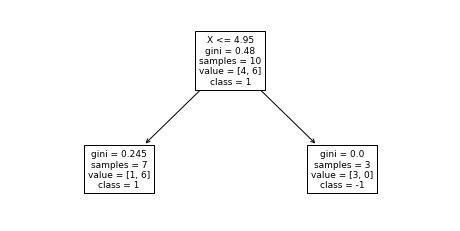

Round #3
x: [4.6 5.3 9.5 4.6 5.2 9.5 0.5 4.9 9.5 4.5]
y: [ 1  1  1  1  1 -1 -1 -1 -1 -1]
Decision Tree:



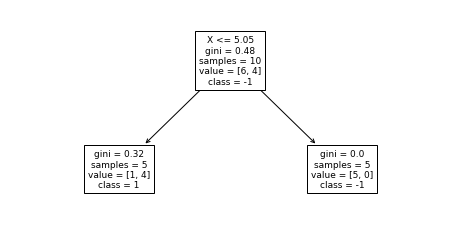

Round #4
x: [4.5 4.6 5.3 4.6 4.6 3.  5.3 4.6 3.  9.5]
y: [ 1  1  1  1  1 -1 -1 -1 -1 -1]
Decision Tree:



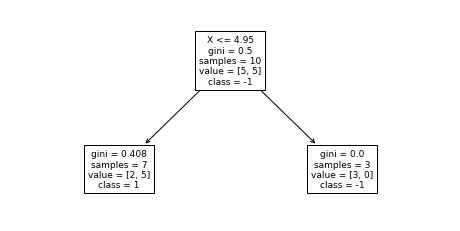

Round #5
x: [5.3 4.6 5.5 4.6 4.5 5.2 5.5 5.5 4.9 7. ]
y: [ 1  1  1  1  1 -1 -1 -1 -1 -1]
Decision Tree:



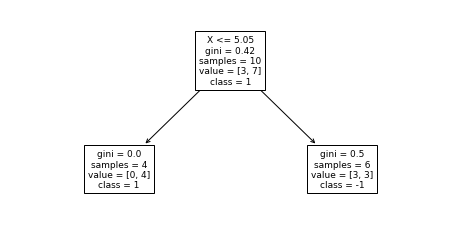

Round #6
x: [7.  5.5 4.6 4.6 5.3 5.5 4.5 5.5 4.9 0.5]
y: [-1  1  1  1  1  1  1  1  1  1]
Decision Tree:



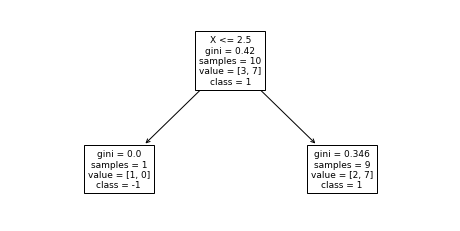

[Early Stop]: Training has hit error = 0.09313264346190028


Tree Model:
   Split Point     Alpha         E
1         4.90  1.098612  0.100000
2         4.95  0.225993  0.388889
3         5.05  0.293893  0.357143
4         4.95  0.693147  0.200000
5         5.05  0.356550  0.328914
6         2.50  1.137986  0.093133

Probability Distribution:
        0.5       3.0       4.5       4.6       4.9       5.2       5.3  \
1  0.100000  0.100000  0.100000  0.100000  0.100000  0.100000  0.100000   
2  0.055556  0.055556  0.055556  0.500000  0.055556  0.055556  0.055556   
3  0.045455  0.071429  0.071429  0.409091  0.071429  0.071429  0.071429   
4  0.035354  0.100000  0.100000  0.318182  0.100000  0.055556  0.055556   
5  0.022096  0.062500  0.250000  0.198864  0.062500  0.034722  0.034722   
6  0.033589  0.046566  0.186265  0.148166  0.046566  0.025870  0.052783   

        5.5       7.0       9.5  
1  0.100000  0.100000  0.100000  
2  0.055556  0.055556  0.055556  
3  0.071429  0.045455  0.07

In [4]:
train_x = np.array([0.5,3.0,4.5,4.6,4.9,5.2,5.3,5.5,7.0,9.5])
train_y = np.array([-1,-1,1,1,1,-1,-1,1,-1,-1])

test_x = np.array([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0])

T = 10 #number of boosting rounds
nrows = train_x.shape[0]
prob = np.full( (nrows,), 1/nrows )
indx = np.array(range(nrows)) #array of indexes to sample from

## arrays to hold each round's output
ensemble = np.zeros((T,nrows))
trees = np.zeros((T,3))
probabilities = np.zeros((T,nrows))

## Select bootstrap samples from a data set
##   @param data : np-array data set
##   @param samples : number of samples to obtain from data set
##   @param probs : np-array of probabilities records from data set are chosen
def bootstrap(data, samples, probs):
    return rng.choice(data, size=samples, p=probs)


for t in range(T):
        
    error = 0.5
    while(error >= 0.5):
        sample = bootstrap(indx, nrows, prob)
        dst = DecisionTreeClassifier(max_depth=1, random_state=SEED).fit(train_x[sample].reshape(-1,1), train_y[sample])
        preds = dst.predict(train_x.reshape(-1,1))    
        
        err = np.where(preds == train_y[sample], 0, 1)
        error = np.sum(err * prob)
        
        ## if current boosting session is not good, redo
        if(error >= 0.5):
            prob = np.full( (nrows,), 1/nrows )
        
    probabilities[t,:] = prob
        
    ## print the boosting round samples and predictions
    print(f'Round #{t+1}')
    print(f'x: {train_x[sample]}')
    print(f'y: {preds}')
    print('Decision Tree:\n')
    decision_tree(dst, feats=['X'], clss=['-1','1'])
    print("==============")
    
    if(error == 0): #allows for rounds with perfect performance to contribute to ensemble
        error = 0.0001
    
    ## add weighted values to ensemble numpy array, save information about tree to tree numpy array
    alpha = np.log((1 - error)/error) / 2
    ensemble[t,:] = alpha * dst.predict(test_x.reshape(-1,1))
    trees[t,:] = np.array([dst.tree_.threshold[0], alpha, error])
        
    if(error < 0.1):
        print(f'[Early Stop]: Training has hit error = {error}')
        break
       
    ## update probabilities    
    prob[err == 1] = prob[err == 1]/(2 * error) #misclassified
    prob[err == 0] = prob[err == 0]/(2 *(1 - error)) #correctly classified
        
print(f'\n\nTree Model:\n{pd.DataFrame(trees[:t+1,:], columns=["Split Point","Alpha","E"], index=range(1,t+2))}\n')
print(f'Probability Distribution:\n{pd.DataFrame(probabilities[:t+1,:], columns=train_x, index=range(1,t+2))}\n')
    


We will now use an ensemble model to predict the classes of our test set

In [5]:
## make the ensemble predictions
sum_of_trials = np.sum(ensemble, axis=0)
print(f'Sum : {sum_of_trials}')
test_pred = np.sign(sum_of_trials)
print(f'Sign: {test_pred}')   
print(f'Accuracy: {(np.sum(np.where(test_pred == train_y, 1, 0))/nrows) * 100}%')

Sum : [-0.66701477 -0.66701477  1.60895668  1.60895668 -0.22932281 -1.53020981
 -1.53020981 -1.53020981 -1.53020981 -1.53020981]
Sign: [-1. -1.  1.  1. -1. -1. -1. -1. -1. -1.]
Accuracy: 80.0%
